#### Importing packages needed for preprocessing

In [860]:
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
%matplotlib inline

#### Read the data files

In [861]:
d1 = pd.read_csv('MiTH_Data/Data_For_all/train.csv')
d2 = pd.read_csv('MiTH_Data/Data_For_all/train_merchant_data.csv')
d3 = pd.read_csv('MiTH_Data/Data_For_all/train_order_data.csv')

#### We can see that data files can be merged with Merchant_ID

In [862]:
merged_data = d1.merge(d2,left_on='Merchant_ID',right_on='Merchant_ID').merge(d3,left_on='Merchant_ID',right_on='Merchant_ID')

In [863]:
merged_data.head()

,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,221592,0,1746213,2018-07-01 06:43:23,QDZKUGCGLVPZG,F,42,157.217.17.33,149173,6641fb40fd59,2018-10-29 17:58:25,205,Direct,Credit Card
1,316935,1,1746213,2018-01-18 01:10:42,GCCLHNBNIJJGW,M,42,46.8.62.247,117942,09ce4ab420a6,2018-03-24 20:15:57,88,Ads,Cash On Delivery
2,38454,1,1746213,2018-07-16 07:56:34,DAXDXWHPMSUJG,M,19,222.110.0.90,125604,41274e2a70c0,2018-09-19 15:13:54,100,Direct,Credit Card
3,214437,1,1746213,2018-04-28 17:08:09,XPBKQAAEUPZAO,F,35,104.242.92.50,155981,e8538b380577,2018-05-27 23:24:42,60,Direct,Debit Card
4,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet


### We have used rgeolocate package in R and extracted country information from IP Address

In [864]:
ip_loc = pd.read_csv('MiTH_Data/Data_For_all/train_IP_to_Location.csv')

### We have merged the data files based on  IP_Address

In [865]:
merged_data_loc = merged_data.merge(ip_loc,left_on='IP_Address',right_on='IP_Address',)

In [866]:
merged_data_loc.sample()

,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Unnamed: 0,Country
34194,128512,0,1746213,2018-02-12 15:06:18,YVRAGOOXSDWRH,M,34,214.38.25.208,126586,73b9a1f4cd8a,2018-03-19 06:21:54,132,SEO,Credit Card,51639,United States


### We see that merging created Unnamed Column so lets drop that

In [867]:
merged_data_loc.drop(['Unnamed: 0'],inplace=True,axis=1)

In [868]:
merged_data_loc.Country.value_counts()

United States                25153
China                         5072
Japan                         3390
United Kingdom                1905
Republic of Korea             1748
Germany                       1573
France                        1490
Canada                        1351
Brazil                        1269
Netherlands                    835
India                          777
Italy                          777
Russia                         704
Australia                      703
Mexico                         607
Taiwan                         510
Spain                          475
Sweden                         427
South Africa                   401
Switzerland                    313
Norway                         290
Argentina                      282
Poland                         275
Indonesia                      274
Vietnam                        266
Denmark                        250
Hong Kong                      228
Turkey                         224
Colombia            

In [869]:
merged_data.shape

(54213, 14)

In [870]:
merged_data_loc.shape

(65397, 15)

In [871]:
merged_data_loc.duplicated().sum()

11184

### We can see that merging created some duplicates in our data. So lets remove them

In [872]:
merged_data_loc[merged_data_loc.duplicated()]

,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Country
5,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet,Japan
6,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet,Japan
7,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet,Japan
8,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet,Japan
9,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet,Japan
10,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet,Japan
11,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet,Japan
12,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet,Japan
14,123430,1,1746213,2018-01-09 00:26:10,VGGTRBYDZMCPN,F,27,175.104.225.24,129009,27d3241bbdd7,2018-01-11 00:26:11,88,Ads,E-wallet,Japan
15,123430,1,1746213,2018-01-09 00:26:10,VGGTRBYDZMCPN,F,27,175.104.225.24,129009,27d3241bbdd7,2018-01-11 00:26:11,88,Ads,E-wallet,Japan


### Lets takes backups before droping them.

In [873]:
bkp_merged_data = merged_data.copy()
bkp_merged_data_loc = merged_data_loc.copy()

In [874]:
merged_data_loc.drop_duplicates(inplace=True,keep='first')

In [875]:
print(merged_data.shape)
print(merged_data_loc.shape)

(54213, 14)
(54213, 15)


### Now that we have added our desired feature. Lets do some preporcessing

In [876]:
merged_data_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 65396
Data columns (total 15 columns):
Merchant_ID                   54213 non-null int64
Fraudster                     54213 non-null int64
Ecommerce_Provider_ID         54213 non-null int64
Merchant_Registration_Date    54213 non-null object
Registered_Device_ID          54213 non-null object
Gender                        54213 non-null object
Age                           54213 non-null int64
IP_Address                    54213 non-null object
Customer_ID                   54213 non-null int64
Order_ID                      54213 non-null object
Date_of_Order                 54213 non-null object
Order_Value_USD               54213 non-null int64
Order_Source                  54213 non-null object
Order_Payment_Method          54213 non-null object
Country                       46416 non-null object
dtypes: int64(6), object(9)
memory usage: 6.6+ MB


In [877]:
merged_data_loc.dtypes

Merchant_ID                    int64
Fraudster                      int64
Ecommerce_Provider_ID          int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Country                       object
dtype: object

In [878]:
merged_data_loc.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Merchant_ID,54213,NaN,NaN,NaN,200395,115398,2,100997,200574,300407,399993
Fraudster,54213,NaN,NaN,NaN,0.0926899,0.29,0,0,0,0,1
Ecommerce_Provider_ID,54213,NaN,NaN,NaN,1.74621e+06,0,1.74621e+06,1.74621e+06,1.74621e+06,1.74621e+06,1.74621e+06
Merchant_Registration_Date,54213,54213,2018-07-30 02:20:43,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registered_Device_ID,54213,51291,RJEAMRBBMPWEA,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,54213,2,M,31761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,54213,NaN,NaN,NaN,33.1222,8.63009,18,27,32,39,72
IP_Address,54213,52028,66.198.113.69,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,54213,NaN,NaN,NaN,137966,15563.5,111234,124471,137864,151405,165000
Order_ID,54213,54213,e87c040d610d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [879]:
merged_data_loc.Ecommerce_Provider_ID.value_counts()

1746213    54213
Name: Ecommerce_Provider_ID, dtype: int64

### We can see that Ecommerce_Provider_ID has only 1 unique value. So it is not useful for us to preditc Fraud Merchant. So we can drop the column.

In [880]:
merged_data_loc.drop(['Ecommerce_Provider_ID'],inplace=True,axis=1)

In [881]:
bkp_merged_data_loc = merged_data_loc.copy()

In [882]:
merged_data_loc.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Merchant_ID,54213,NaN,NaN,NaN,200395,115398,2,100997,200574,300407,399993
Fraudster,54213,NaN,NaN,NaN,0.0926899,0.29,0,0,0,0,1
Merchant_Registration_Date,54213,54213,2018-07-30 02:20:43,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registered_Device_ID,54213,51291,RJEAMRBBMPWEA,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,54213,2,M,31761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,54213,NaN,NaN,NaN,33.1222,8.63009,18,27,32,39,72
IP_Address,54213,52028,66.198.113.69,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,54213,NaN,NaN,NaN,137966,15563.5,111234,124471,137864,151405,165000
Order_ID,54213,54213,e87c040d610d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Order,54213,54161,2018-05-21 05:58:13,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [883]:
import pandas_profiling as pp

In [884]:
pp.ProfileReport(merged_data_loc)

Number of variables,15
Number of observations,54213
Total Missing (%),1.0%
Total size in memory,6.2 MiB
Average record size in memory,120.0 B
Numeric,5
Categorical,7
Boolean,1
Date,0
Text (Unique),2
Rejected,0


### There are 7797 missing values in the Country column. Lets fill them with 'country Unknown' for now.

In [885]:
merged_data_loc.Country.fillna('Unknown', inplace = True)

In [886]:
bkp_merged_data_loc = merged_data_loc.copy()

### Lets deal with dtypes.

In [887]:
merged_data_loc.dtypes

Merchant_ID                    int64
Fraudster                      int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Country                       object
dtype: object

- Fraudster should be object
- Merchant_Registration_Date should be data
- Customer_ID should be object
- Date_of_Order should be data

In [888]:
merged_data_loc['Merchant_ID'] = merged_data_loc['Merchant_ID'].astype('object')

### From Merchant_Registration_Date we can extract information about the Merchant. (how long is he associated with XYZ company)

#### For that lets convert Merchant_Registration_Date to Date type

In [894]:
merged_data_loc['Merchant_Registration_Date'] = pd.to_datetime(merged_data_loc['Merchant_Registration_Date'])

In [892]:
merged_data_loc.head(1)

,Merchant_ID,Fraudster,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Country
0,221592,0,2018-07-01 06:43:23,QDZKUGCGLVPZG,F,42,157.217.17.33,149173,6641fb40fd59,2018-10-29 17:58:25,205,Direct,Credit Card,United States


#### Lets convert Date_of_Order to Date type as well

In [895]:
merged_data_loc['Date_of_Order'] = pd.to_datetime(merged_data_loc['Date_of_Order'])

In [896]:
merged_data_loc.head(1)

,Merchant_ID,Fraudster,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Country
0,221592,0,2018-07-01 06:43:23,QDZKUGCGLVPZG,F,42,157.217.17.33,149173,6641fb40fd59,2018-10-29 17:58:25,205,Direct,Credit Card,United States


In [897]:
merged_data_loc['Customer_ID'] = merged_data_loc['Customer_ID'].astype('object')

In [172]:
pp.ProfileReport(merged_data_loc)

Number of variables,15
Number of observations,54213
Total Missing (%),0.0%
Total size in memory,6.2 MiB
Average record size in memory,120.0 B
Numeric,5
Categorical,6
Boolean,1
Date,2
Text (Unique),1
Rejected,0


### Lets create 5 dates from min and max from Merchant_Registration_Date

In [898]:
t = (max(merged_data_loc['Merchant_Registration_Date']) - min(merged_data_loc['Merchant_Registration_Date']))/5

In [899]:
from pandas.tslib import Timestamp

In [900]:
t2 = min(merged_data_loc['Merchant_Registration_Date']) + t

In [901]:
t3 = t2 + t

In [902]:
t4 = t3 + t

In [903]:
t5 = t4 + t

In [904]:
t6 = t5 + t

In [905]:
print(min(merged_data_loc['Merchant_Registration_Date']))
print(t2)
print(t3)
print(t4)
print(t5)
print(t6)

2018-01-01 00:00:45
2018-02-15 20:08:41.800000
2018-04-02 16:16:38.600000
2018-05-18 12:24:35.400000
2018-07-03 08:32:32.200000
2018-08-18 04:40:29


In [906]:
t1 = min(merged_data_loc['Merchant_Registration_Date'])

### Lets bin the Merchant_Registration_Date using t1 to t6 as bins and create categories

In [907]:
bins = [t1,t2,t3,t4,t5,t6]
merged_data_loc['Merchant_Age'] = pd.cut(merged_data_loc['Merchant_Registration_Date'], bins,include_lowest=True,labels=['Very_old','Old','Avg','New','Latest'])

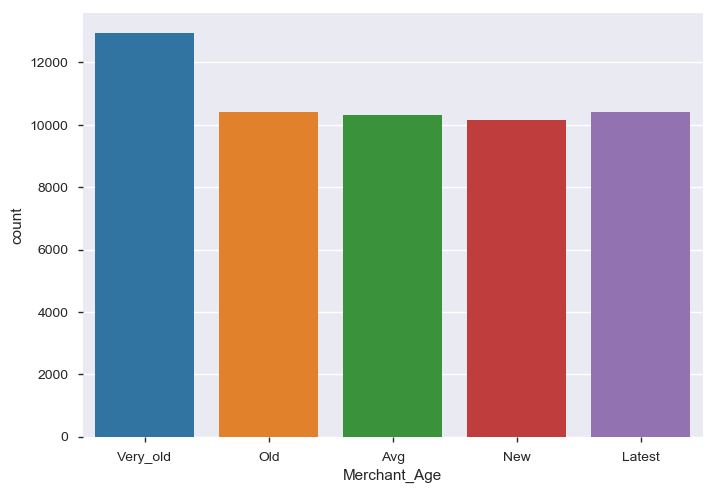

In [908]:
sns.countplot(merged_data_loc['Merchant_Age'])

### lets drop Merchant_Registration_Date Column.

In [909]:
merged_data_loc.drop(['Merchant_Registration_Date'],axis = 1, inplace=True)

In [910]:
merged_data_loc['Merchant_Age'] = merged_data_loc['Merchant_Age'].astype('object')

### Lets prepare a base model with the attributes we have.

### Lets prepare a test set with all the steps we did for train set

In [911]:
d4 = pd.read_csv('MiTH_Data/Data_For_all/test.csv')
d5 = pd.read_csv('MiTH_Data/Data_For_all/test_merchant_data.csv')
d6 = pd.read_csv('MiTH_Data/Data_For_all/test_order_data.csv')

In [912]:
merged_data_test = d4.merge(d5,left_on='Merchant_ID',right_on='Merchant_ID').merge(d6,left_on='Merchant_ID',right_on='Merchant_ID')

In [913]:
ip_loc_test = pd.read_csv('MiTH_Data/Data_For_all/test_IP_to_Location.csv')
merged_data_loc_test = merged_data_test.merge(ip_loc_test,left_on='IP_Address',right_on='IP_Address',)
merged_data_loc_test.drop(['Unnamed: 0'],inplace=True,axis=1)

In [914]:
merged_data_loc_test[merged_data_loc_test.duplicated()]

,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Country
7,286064,1746213,2018-01-12 01:04:37,YZUTNBIQUUKJG,M,28,88.120.173.167,126307,2000c9a7f224,2018-01-14 01:04:38,125,Ads,Internet Banking,France
8,286064,1746213,2018-01-12 01:04:37,YZUTNBIQUUKJG,M,28,88.120.173.167,126307,2000c9a7f224,2018-01-14 01:04:38,125,Ads,Internet Banking,France
10,69362,1746213,2018-01-12 01:04:31,YZUTNBIQUUKJG,M,28,88.120.173.167,116940,8c8512004616,2018-01-14 01:04:32,125,Ads,Internet Banking,France
11,69362,1746213,2018-01-12 01:04:31,YZUTNBIQUUKJG,M,28,88.120.173.167,116940,8c8512004616,2018-01-14 01:04:32,125,Ads,Internet Banking,France
13,82875,1746213,2018-01-12 01:04:36,YZUTNBIQUUKJG,M,28,88.120.173.167,142066,c939ceca7e7c,2018-01-14 01:04:37,125,Ads,Internet Banking,France
14,82875,1746213,2018-01-12 01:04:36,YZUTNBIQUUKJG,M,28,88.120.173.167,142066,c939ceca7e7c,2018-01-14 01:04:37,125,Ads,Internet Banking,France
27,122060,1746213,2018-01-12 15:01:36,CDFDCMCYRCMIK,M,32,40.92.117.57,157211,fbd16d2b6d6e,2018-01-14 15:01:37,115,Ads,Credit Card,United States
28,122060,1746213,2018-01-12 15:01:36,CDFDCMCYRCMIK,M,32,40.92.117.57,157211,fbd16d2b6d6e,2018-01-14 15:01:37,115,Ads,Credit Card,United States
30,280766,1746213,2018-01-12 15:01:33,CDFDCMCYRCMIK,M,32,40.92.117.57,138634,992a27124dfe,2018-01-14 15:01:34,115,Ads,Credit Card,United States
31,280766,1746213,2018-01-12 15:01:33,CDFDCMCYRCMIK,M,32,40.92.117.57,138634,992a27124dfe,2018-01-14 15:01:34,115,Ads,Credit Card,United States


In [915]:
bkp_merged_data_test = merged_data_test.copy()
bkp_merged_data_loc_test = merged_data_loc_test.copy()

merged_data_loc_test.drop_duplicates(inplace=True,keep='first')

In [916]:
print(merged_data_test.shape)
print(merged_data_loc_test.shape)

(13554, 13)
(13554, 14)


In [917]:
merged_data_loc_test.drop(['Ecommerce_Provider_ID'],inplace=True,axis=1)

In [918]:
merged_data_loc_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 14381
Data columns (total 13 columns):
Merchant_ID                   13554 non-null int64
Merchant_Registration_Date    13554 non-null object
Registered_Device_ID          13554 non-null object
Gender                        13554 non-null object
Age                           13554 non-null int64
IP_Address                    13554 non-null object
Customer_ID                   13554 non-null int64
Order_ID                      13554 non-null object
Date_of_Order                 13554 non-null object
Order_Value_USD               13554 non-null int64
Order_Source                  13554 non-null object
Order_Payment_Method          13554 non-null object
Country                       11575 non-null object
dtypes: int64(4), object(9)
memory usage: 1.4+ MB


In [919]:
bkp_merged_data_loc_test = merged_data_loc.copy()

merged_data_loc_test.Country.fillna('Unknown', inplace = True)
bkp_merged_data_loc_test = merged_data_loc_test.copy()

In [920]:
merged_data_loc_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 14381
Data columns (total 13 columns):
Merchant_ID                   13554 non-null int64
Merchant_Registration_Date    13554 non-null object
Registered_Device_ID          13554 non-null object
Gender                        13554 non-null object
Age                           13554 non-null int64
IP_Address                    13554 non-null object
Customer_ID                   13554 non-null int64
Order_ID                      13554 non-null object
Date_of_Order                 13554 non-null object
Order_Value_USD               13554 non-null int64
Order_Source                  13554 non-null object
Order_Payment_Method          13554 non-null object
Country                       13554 non-null object
dtypes: int64(4), object(9)
memory usage: 1.4+ MB


In [923]:
merged_data_loc_test['Merchant_ID'] = merged_data_loc_test['Merchant_ID'].astype('object')
merged_data_loc_test['Merchant_Registration_Date'] = pd.to_datetime(merged_data_loc_test['Merchant_Registration_Date'])
merged_data_loc_test['Date_of_Order'] = pd.to_datetime(merged_data_loc_test['Date_of_Order'])
merged_data_loc_test['Customer_ID'] = merged_data_loc_test['Customer_ID'].astype('object')

In [924]:
print(max(merged_data_loc_test['Merchant_Registration_Date']))
print(min(merged_data_loc_test['Merchant_Registration_Date']))

2018-08-18 04:37:34
2018-01-01 00:00:49


In [925]:
t = (max(merged_data_loc_test['Merchant_Registration_Date']) - min(merged_data_loc_test['Merchant_Registration_Date']))/5
t2 = min(merged_data_loc_test['Merchant_Registration_Date']) + t
t3 = t2 + t
t4 = t3 + t
t5 = t4 + t
t6 = t5 + t

In [926]:
t1 = min(merged_data_loc_test['Merchant_Registration_Date'])

bins = [t1,t2,t3,t4,t5,t6]
merged_data_loc_test['Merchant_Age'] = pd.cut(merged_data_loc_test['Merchant_Registration_Date'], bins,include_lowest=True,labels=['Very_old','Old','Avg','New','Latest'])

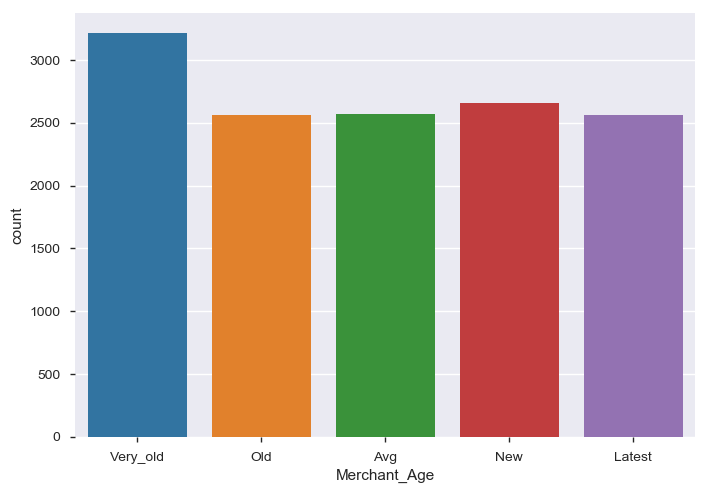

In [927]:
sns.countplot(merged_data_loc_test['Merchant_Age'])

In [928]:
merged_data_loc_test.drop(['Merchant_Registration_Date'],axis = 1, inplace=True)
merged_data_loc_test['Merchant_Age'] = merged_data_loc_test['Merchant_Age'].astype('object')

### Lets drop all the ID cols from test.

In [929]:
test_X = merged_data_loc_test.drop(['Merchant_ID','Registered_Device_ID','IP_Address','Customer_ID','Date_of_Order','Order_ID'],axis=1)

In [930]:
X = merged_data_loc.drop(['Fraudster','Merchant_ID','Registered_Device_ID','IP_Address','Customer_ID','Date_of_Order','Order_ID'],axis=1)
y = merged_data_loc['Fraudster']

In [931]:
X.shape

(54213, 7)

In [932]:
test_X.shape

(13554, 7)

In [933]:
test_X.dtypes

Gender                  object
Age                      int64
Order_Value_USD          int64
Order_Source            object
Order_Payment_Method    object
Country                 object
Merchant_Age            object
dtype: object

### Lets seperate numerical and categorical attributes and perform scaling on numericals with StandardScaler

In [934]:
numX = [x for x in X.dtypes.index if X.dtypes[x]=='int64']
catX = [x for x in X.dtypes.index if X.dtypes[x]=='object']

In [935]:
from sklearn.preprocessing import StandardScaler

In [936]:
ss = StandardScaler()

In [937]:
X[numX] = ss.fit_transform(X[numX])
test_X[numX] = ss.transform(test_X[numX])

C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\lokesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



In [938]:
X.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age
33302,M,0.449334,0.49854,Direct,Credit Card,United States,Latest


In [939]:
test_X.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age
3990,M,-1.172912,0.783174,SEO,Credit Card,China,New


In [940]:
bkp_X = X.copy()
bkp_test_X = test_X.copy()

### Lets dummy the Categorical columns

In [941]:
X = pd.get_dummies(X,drop_first=True,prefix_sep='_')

In [942]:
test_X = pd.get_dummies(test_X,drop_first=True,prefix_sep='_')

In [943]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [944]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# LOGISTIC REG 

In [945]:
from sklearn.linear_model import LogisticRegression
logmod_base=LogisticRegression()

In [946]:
logmod_base.fit(X_train,y_train)

C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [947]:
y_pred_base=logmod_base.predict(X_test)

In [948]:
y_pred_base_train = logmod_base.predict(X_train)
f1_log_reg_base_X_train = f1_score(y_train,y_pred_base_train)

In [949]:
f1_log_reg_base_X = f1_score(y_test,y_pred_base)

In [950]:
test_X

,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Country_Angola,...,Country_United Kingdom,Country_United States,Country_Unknown,Country_Uruguay,Country_Venezuela,Country_Vietnam,Merchant_Age_Latest,Merchant_Age_New,Merchant_Age_Old,Merchant_Age_Very_old
0,0.796958,-0.705676,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.681084,-1.406311,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.172912,-0.377254,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.101710,0.126328,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,-1.520536,-1.253047,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2.303329,-1.034099,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
6,-0.593538,0.717489,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,-0.593538,0.717489,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
12,-0.593538,0.717489,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
15,-0.014165,-0.596202,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [952]:
test_X.shape

(13554, 116)

In [327]:
X.shape

(54213, 131)

## We have some column mismatch between train and test sets. so lets address that

In [953]:
dum_diff_cols = list(set(X.columns)-set(test_X.columns))

for c in dum_diff_cols:
    test_X[c]=0

In [954]:
test_X = test_X[X.columns]

In [955]:
y_pred_base_test_X=logmod_base.predict(test_X)

temp = pd.DataFrame(y_pred_base_test_X,columns=['Fraudster'])

temp.shape

(13554, 1)

In [956]:
d4.shape

(13554, 1)

In [957]:
d4['Fraudster'] = temp['Fraudster']

In [958]:
d4.to_csv('base_solution.csv',index=False)

In [959]:
temp.Fraudster.value_counts()

0    13548
1        6
Name: Fraudster, dtype: int64

In [960]:
d1.Fraudster.value_counts()

0    49188
1     5025
Name: Fraudster, dtype: int64

## Lets create a dataframe to keep track of all the models we built.

In [380]:
models_metrics = pd.DataFrame({'Model':[] ,'Description':[] , 'F1 SCORE_train':[], 'F1 SCORE_test':[] })
y_preds_test = pd.DataFrame()

In [387]:
temp = ['LOG_REG_BASE','BASE X set',f1_log_reg_base_X_train,f1_log_reg_base_X]

In [388]:
models_metrics.loc[0]=temp

In [369]:
models_metrics

,Model,Description,F1 SCORE
0,LOG_REG_BASE,BASE X set,0.006276


In [371]:
y_preds_test['y_prey_pred_base_test_X'] = y_pred_base_test_X

## WEIGHTED RF with n_estimators = 50

In [372]:
from sklearn.ensemble import RandomForestClassifier

In [373]:
rfc_weights = RandomForestClassifier(n_estimators=50,class_weight={0:0.1,1:0.9})

rfc_weights.fit(X=X_train,y=y_train)
y_pred_rfc_weights = rfc_weights.predict(X_test)

y_pred_rfc_weights_train = rfc_weights.predict(X_train)

f1_rfc_weights_test = f1_score(y_test,y_pred_rfc_weights)

f1_rfc_weights_train = f1_score(y_train,y_pred_rfc_weights_train)

temp = ['RFC WEIGHT','BASE X set',f1_rfc_weights_train,f1_rfc_weights_test]

In [384]:
models_metrics.loc[1]=temp

In [389]:
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276


In [ ]:
y_pred_base_test_X=logmod_base.predict(test_X)

temp = pd.DataFrame(y_pred_base_test_X,columns=['Fraudster'])

temp.shape

## Lets create a submission file

In [390]:
y_pred_base_test_X_rfc_weights=rfc_weights.predict(test_X)

temp = pd.DataFrame(y_pred_base_test_X_rfc_weights,columns=['Fraudster'])

d4['Fraudster'] = temp['Fraudster']

d4.to_csv('base_solution_rfc_wts.csv',index=False)

temp.Fraudster.value_counts()

### Lets try to build more features

In [400]:
merged_data_loc

,Merchant_ID,Fraudster,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age
0,221592,0,QDZKUGCGLVPZG,F,42,157.217.17.33,149173,6641fb40fd59,2018-10-29 17:58:25,205,Direct,Credit Card,United States,New
1,316935,1,GCCLHNBNIJJGW,M,42,46.8.62.247,117942,09ce4ab420a6,2018-03-24 20:15:57,88,Ads,Cash On Delivery,Russia,Very_old
2,38454,1,DAXDXWHPMSUJG,M,19,222.110.0.90,125604,41274e2a70c0,2018-09-19 15:13:54,100,Direct,Credit Card,Republic of Korea,Latest
3,214437,1,XPBKQAAEUPZAO,F,35,104.242.92.50,155981,e8538b380577,2018-05-27 23:24:42,60,Direct,Debit Card,Canada,Avg
4,296240,1,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet,Japan,Very_old
13,123430,1,VGGTRBYDZMCPN,F,27,175.104.225.24,129009,27d3241bbdd7,2018-01-11 00:26:11,88,Ads,E-wallet,Japan,Very_old
22,323070,1,VGGTRBYDZMCPN,F,27,175.104.225.24,140914,84d301a7ede5,2018-01-11 00:26:15,88,Ads,E-wallet,Japan,Very_old
31,378988,1,VGGTRBYDZMCPN,F,27,175.104.225.24,148287,96cd48f34a46,2018-01-11 00:26:13,88,Ads,E-wallet,Japan,Very_old
40,220791,1,VGGTRBYDZMCPN,F,27,175.104.225.24,143065,ca2d28a6679a,2018-01-11 00:26:16,88,Ads,E-wallet,Japan,Very_old
49,4671,1,VGGTRBYDZMCPN,F,27,175.104.225.24,155281,c144ee636210,2018-01-11 00:26:19,88,Ads,E-wallet,Japan,Very_old


In [401]:
pp.ProfileReport(merged_data_loc)

Number of variables,15
Number of observations,54213
Total Missing (%),0.0%
Total size in memory,6.2 MiB
Average record size in memory,120.0 B
Numeric,5
Categorical,7
Boolean,1
Date,1
Text (Unique),1
Rejected,0


In [402]:
merged_data_loc.sample(5)

,Merchant_ID,Fraudster,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age
42260,153014,0,BMOOJQMMBXFXH,M,39,76.255.30.21,132785,9d71e44e7783,2018-03-02 11:01:53,160,Direct,Internet Banking,United States,Very_old
2170,202640,0,DUIFBORBEFUDW,M,42,210.88.252.183,143229,f777bd24fdac,2018-08-27 23:34:03,35,SEO,E-wallet,Japan,New
63483,317305,0,XWNGHTLYIKKWD,F,29,65.190.230.163,156083,0f9662bd8c07,2018-06-25 12:54:51,110,Direct,E-wallet,United States,Avg
43313,91533,1,PFVKHBQGAURMA,F,52,33.118.117.77,129155,c39a46ff9867,2018-05-24 01:40:04,50,SEO,Internet Banking,United States,Old
20023,85331,0,UWHCNRKGIJZMO,M,29,27.252.95.122,117359,7ff85db00a98,2018-10-11 05:26:41,178,Ads,Credit Card,New Zealand,New


In [963]:
train_data = merged_data_loc.copy()

## Lets Use Date_of_Order column to create a new feature about the month of the order.

In [964]:
train_data.drop(['Merchant_ID','Order_ID','Registered_Device_ID'],inplace=True,axis=1)

In [965]:
train_data.Date_of_Order = train_data.Date_of_Order.astype('str')

In [966]:
train_data.Date_of_Order

0        2018-10-29 17:58:25
1        2018-03-24 20:15:57
2        2018-09-19 15:13:54
3        2018-05-27 23:24:42
4        2018-01-11 00:26:20
13       2018-01-11 00:26:11
22       2018-01-11 00:26:15
31       2018-01-11 00:26:13
40       2018-01-11 00:26:16
49       2018-01-11 00:26:19
58       2018-01-11 21:13:53
67       2018-01-11 00:26:10
76       2018-01-11 00:26:18
85       2018-07-20 08:26:31
86       2018-04-13 15:07:26
87       2018-08-19 06:53:03
88       2018-01-12 06:31:08
92       2018-01-12 06:31:13
96       2018-01-12 06:31:17
100      2018-01-12 06:31:14
104      2018-09-06 07:20:34
105      2018-05-05 23:23:52
106      2018-10-05 22:01:21
107      2018-07-29 07:30:59
108      2018-10-07 06:42:29
109      2018-01-11 07:46:09
112      2018-01-11 07:46:03
115      2018-05-06 13:22:47
118      2018-03-25 19:48:28
119      2018-05-28 18:25:31
                ...         
65367    2018-10-30 02:27:19
65368    2018-09-13 05:16:28
65369    2018-05-24 07:50:41
65370    2018-

In [967]:
train_data['Month_of_Order'] = train_data['Date_of_Order'].apply(lambda x: x.split(sep='-')[1])

In [968]:
train_data.drop(['Date_of_Order'],axis=1,inplace=True)

In [974]:
import cufflinks as cf
import plotly.offline as py
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objs as go

In [975]:
trace1 = go.Bar(
    x=pd.crosstab(train_data['Fraudster'],train_data['Month_of_Order']).iloc[0,:].index,
    y=pd.crosstab(train_data['Fraudster'],train_data['Month_of_Order']).iloc[0,:],
    name='Not A Fraudster'
)
trace2 = go.Bar(
    x=pd.crosstab(train_data['Fraudster'],train_data['Month_of_Order']).iloc[1,:].index,
    y=pd.crosstab(train_data['Fraudster'],train_data['Month_of_Order']).iloc[1,:],
    name='Fraudster'
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Relation between Month_of_Order and Fraudster',
    xaxis = dict(title = 'Month_of_Order'),
    yaxis = dict(title = 'Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [418]:
train_data.drop(['IP_Address'], inplace = True, axis = 1)

In [420]:
train_data.sample()

,Fraudster,Gender,Age,Customer_ID,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order
48112,0,M,29,134107,58,Ads,Credit Card,Japan,Avg,09


In [422]:
train_data.Customer_ID.value_counts()

111658    7
124702    7
156576    7
154763    7
148923    6
113846    6
143061    6
131384    6
120135    6
145537    6
161878    6
113714    6
152990    6
142384    6
122022    6
145614    6
129638    6
135068    6
121569    6
130622    6
162762    6
159759    6
145667    6
140577    6
147739    6
161277    6
141327    6
133909    6
148560    6
120920    6
         ..
162188    1
162190    1
162191    1
162193    1
162194    1
162144    1
162138    1
162096    1
162112    1
162098    1
162099    1
162100    1
162101    1
162102    1
162104    1
162106    1
162109    1
162111    1
162113    1
162137    1
162114    1
162120    1
162121    1
162125    1
162128    1
162132    1
162134    1
162135    1
162136    1
131072    1
Name: Customer_ID, Length: 34081, dtype: int64

In [430]:
temp_cust_value_counts = pd.DataFrame(train_data.Customer_ID.value_counts())

In [432]:
temp_cust_value_counts.reset_index(level=0,inplace=True)

In [437]:
temp_cust_value_counts['cust_count'] = temp_cust_value_counts['Customer_ID']

In [439]:
temp_cust_value_counts.drop(['Customer_ID'],inplace=True,axis=1)

In [441]:
temp_cust_value_counts

,index,cust_count
0,111658,7
1,124702,7
2,156576,7
3,154763,7
4,148923,6
5,113846,6
6,143061,6
7,131384,6
8,120135,6
9,145537,6


In [976]:
bkp_train_data = train_data.copy()

## Lets use  Customer_ID and create new feature about regularity of the customer

In [449]:
temp_cust_value_counts['index'] = temp_cust_value_counts['index'].astype('object')

In [460]:
train_data = train_data.merge(temp_cust_value_counts,left_on='Customer_ID',right_on='index',how='outer')

In [461]:
train_data.drop(['Customer_ID'],inplace=True, axis=1)

In [462]:
train_data.cust_count.value_counts()

1    19759
2    19754
3    10074
4     3392
5     1020
6      186
7       28
Name: cust_count, dtype: int64

In [464]:
bins = [1,3,5,7]
train_data['Customer_Type'] = pd.cut(train_data['cust_count'], bins,include_lowest=True,labels=['New Customer','Avg Customer','Old Customer'])

In [467]:
train_data['Customer_Type'].value_counts()

New Customer    49587
Avg Customer     4412
Old Customer      214
Name: Customer_Type, dtype: int64

In [468]:
train_data.sample()

,Fraudster,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,index,cust_count,Customer_Type
47026,0,M,37,132,Ads,Credit Card,Brazil,Avg,06,123931,1,New Customer


In [469]:
train_data.drop(['cust_count'],inplace=True,axis=1)

In [471]:
train_data.drop(['index'],inplace=True,axis=1)

In [472]:
train_data.dtypes

Fraudster                  int64
Gender                    object
Age                        int64
Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Country                   object
Merchant_Age              object
Month_of_Order            object
Customer_Type           category
dtype: object

In [473]:
train_data['Fraudster'] = train_data['Fraudster'].astype('object')
train_data['Customer_Type'] = train_data['Customer_Type'].astype('object')

In [479]:
merged_data_loc_test

,Merchant_ID,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age
0,53637,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,United States,Very_old
1,243517,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,Australia,Avg
2,343640,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,Ukraine,Very_old
3,69889,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,United States,Old
4,125706,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,United States,Avg
5,99740,QLABSSSYDDVLX,F,53,67.233.208.80,138132,403af6a56bf6,2018-03-12 17:49:02,45,Direct,E-wallet,United States,Very_old
6,286064,YZUTNBIQUUKJG,M,28,88.120.173.167,126307,2000c9a7f224,2018-01-14 01:04:38,125,Ads,Internet Banking,France,Very_old
9,69362,YZUTNBIQUUKJG,M,28,88.120.173.167,116940,8c8512004616,2018-01-14 01:04:32,125,Ads,Internet Banking,France,Very_old
12,82875,YZUTNBIQUUKJG,M,28,88.120.173.167,142066,c939ceca7e7c,2018-01-14 01:04:37,125,Ads,Internet Banking,France,Very_old
15,106848,QNDARFHAOPKEU,M,33,119.4.77.135,156600,14cef8a72083,2018-07-10 21:31:50,65,Ads,Internet Banking,China,New


## Lets do all the steps on Test set as well

In [480]:
test_data = merged_data_loc_test.copy()
test_data.drop(['Merchant_ID','Order_ID','Registered_Device_ID'],inplace=True,axis=1)
test_data.Date_of_Order = test_data.Date_of_Order.astype('str')

0        2018-03-09 09:09:42
1        2018-06-13 20:11:19
2        2018-04-14 04:19:36
3        2018-04-01 13:55:44
4        2018-05-25 02:08:18
5        2018-03-12 17:49:02
6        2018-01-14 01:04:38
9        2018-01-14 01:04:32
12       2018-01-14 01:04:37
15       2018-07-10 21:31:50
16       2018-08-18 02:37:37
17       2018-07-20 21:37:01
18       2018-09-03 22:53:23
19       2018-04-26 11:08:11
20       2018-01-18 11:56:46
21       2018-05-19 21:04:23
22       2018-02-20 23:28:11
23       2018-07-25 09:05:36
24       2018-07-30 17:26:46
25       2018-07-27 11:06:51
26       2018-01-14 15:01:37
29       2018-01-14 15:01:34
32       2018-01-14 15:01:33
35       2018-09-21 22:34:01
36       2018-07-03 08:16:31
37       2018-09-27 22:12:08
38       2018-10-17 18:56:35
39       2018-01-12 15:10:56
40       2018-03-19 13:53:43
41       2018-07-07 05:10:18
                ...         
14352    2018-02-18 08:39:19
14353    2018-03-22 12:02:19
14354    2018-06-08 14:10:02
14355    2018-

In [481]:
test_data['Month_of_Order'] = test_data['Date_of_Order'].apply(lambda x: x.split(sep='-')[1])

In [482]:
test_data.drop(['Date_of_Order'],axis=1,inplace=True)
test_data.drop(['IP_Address'], inplace = True, axis = 1)

In [483]:
temp_cust_value_counts = pd.DataFrame(test_data.Customer_ID.value_counts())
temp_cust_value_counts.reset_index(level=0,inplace=True)

In [484]:
temp_cust_value_counts['cust_count'] = temp_cust_value_counts['Customer_ID']
temp_cust_value_counts.drop(['Customer_ID'],inplace=True,axis=1)
bkp_test_data = test_data.copy()

In [485]:
temp_cust_value_counts['index'] = temp_cust_value_counts['index'].astype('object')

In [486]:
test_data = test_data.merge(temp_cust_value_counts,left_on='Customer_ID',right_on='index',how='outer')

In [487]:
bins = [1,3,5,7]
test_data['Customer_Type'] = pd.cut(test_data['cust_count'], bins,include_lowest=True,labels=['New Customer','Avg Customer','Old Customer'])

In [488]:
test_data['Customer_Type'].value_counts()

New Customer    13530
Avg Customer       24
Old Customer        0
Name: Customer_Type, dtype: int64

In [489]:
test_data.drop(['cust_count'],inplace=True,axis=1)
test_data.drop(['index'],inplace=True,axis=1)

In [491]:
test_data.dtypes

Gender                    object
Age                        int64
Customer_ID               object
Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Country                   object
Merchant_Age              object
Month_of_Order            object
Customer_Type           category
dtype: object

In [492]:
test_data['Customer_Type'] = test_data['Customer_Type'].astype('object')

In [495]:
train_data.sample()

,Fraudster,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
22434,1,F,33,48,SEO,Internet Banking,Unknown,Very_old,03,New Customer


In [496]:
test_data.sample()

,Gender,Age,Customer_ID,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
4096,M,30,123904,112,SEO,Internet Banking,Austria,Very_old,02,New Customer


In [497]:
test_data.drop(['Customer_ID'],inplace=True,axis=1)

In [498]:
test_data.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
6311,M,36,80,Ads,E-wallet,Thailand,New,08,New Customer


In [499]:
train_data.sample()

,Fraudster,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
27134,0,F,18,88,Direct,Internet Banking,United States,Very_old,03,New Customer


In [500]:
y = train_data['Fraudster']

In [511]:
test_data.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
10883,M,18,125,Ads,Credit Card,China,Latest,10,New Customer


In [512]:
train_data.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
6233,F,20,98,Direct,Credit Card,United States,Very_old,03,New Customer


# RF with grid search

In [517]:
numX = [x for x in train_data.dtypes.index if train_data.dtypes[x]=='int64']
catX = [x for x in train_data.dtypes.index if train_data.dtypes[x]=='object']

In [518]:
train_data[numX] = ss.fit_transform(train_data[numX])
test_data[numX] = ss.transform(test_data[numX])

C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lokesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [519]:
train_data.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
4335,M,-1.057037,-1.099784,Direct,Debit Card,United States,Avg,08,New Customer


In [520]:
test_data.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
13164,F,0.449334,1.089701,Ads,Credit Card,United States,Avg,07,New Customer


In [521]:
train_data_X = pd.get_dummies(train_data,drop_first=True,prefix_sep='_')

In [522]:
test_data_X = pd.get_dummies(test_data,drop_first=True,prefix_sep='_')

In [524]:
print(train_data_X.shape)
print(test_data_X.shape)

(54213, 144)
(13554, 128)


In [525]:
dum_diff_cols = list(set(train_data_X.columns)-set(test_data_X.columns))

for c in dum_diff_cols:
    test_data_X[c]=0

test_data_X = test_data_X[train_data_X.columns]

In [528]:
train_data_X.sample()

,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Country_Albania,...,Month_of_Order_05,Month_of_Order_06,Month_of_Order_07,Month_of_Order_08,Month_of_Order_09,Month_of_Order_10,Month_of_Order_11,Month_of_Order_12,Customer_Type_New Customer,Customer_Type_Old Customer
27831,0.217585,-0.486728,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [527]:
test_data_X.sample()

,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Country_Albania,...,Month_of_Order_05,Month_of_Order_06,Month_of_Order_07,Month_of_Order_08,Month_of_Order_09,Month_of_Order_10,Month_of_Order_11,Month_of_Order_12,Customer_Type_New Customer,Customer_Type_Old Customer
1980,0.565209,-0.377254,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [546]:
y = y.astype('int64')

In [532]:
from sklearn.model_selection import GridSearchCV

In [547]:
X_train,X_test,y_train,y_test = train_test_split(train_data_X,y,test_size=0.2)

In [548]:
rfc_grid = RandomForestClassifier(n_jobs=1,max_features='sqrt')

#Use a grid over parameters of interest
## N_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root
## ' A node will only be split if in each of its leaf nodes there should be min_sample_leaf'

param_grid = {
    'n_estimators':[9,18,27,36,45,54,63],
    'max_depth':[5,10],
    'min_samples_leaf':[2,4]}

rfc_cv_grid = GridSearchCV(estimator=rfc_grid,param_grid=param_grid,cv=10)

In [549]:
rfc_cv_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [9, 18, 27, 36, 45, 54, 63], 'max_depth': [5, 10], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [564]:
rfc_cv_grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 9}

In [576]:
y_pred_rfc_cv_grid_test = rfc_cv_grid.predict(X_test)

In [577]:
f1_rfc_cv_grid_test = f1_score(y_test,y_pred_rfc_cv_grid_test)
print (f1_rfc_cv_grid_test)

0.00827300930713547


In [578]:
y_pred_rfc_cv_grid_train = rfc_cv_grid.predict(X_train)

In [579]:
f1_rfc_cv_grid_train = f1_score(y_train,y_pred_rfc_cv_grid_train)
print (f1_rfc_cv_grid_train)

0.0034406488080609486


In [570]:
temp = ['RFC GRID CV','Feature Set',f1_rfc_cv_grid_train,f1_rfc_cv_grid_test]

In [571]:
models_metrics.loc[2]=temp

In [572]:
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273


## Weighted Random Forest

In [580]:
rfc_weights = RandomForestClassifier(n_estimators=50,class_weight={0:0.1,1:0.9})

rfc_weights.fit(X=X_train,y=y_train)
y_pred_rfc_weights = rfc_weights.predict(X_test)
y_pred_rfc_weights_train = rfc_weights.predict(X_train)
f1_rfc_weights_test = f1_score(y_test,y_pred_rfc_weights)
f1_rfc_weights_train = f1_score(y_train,y_pred_rfc_weights_train)

temp = ['RFC WEIGHT','Feature Set',f1_rfc_weights_train,f1_rfc_weights_test]

In [581]:
models_metrics.loc[3]=temp

In [582]:
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576


In [584]:
feat_importances = pd.Series(rfc_weights.feature_importances_,index=X_train.columns)
feat_importances_ordered = feat_importances.nlargest(n=len(feat_importances))

## We can see that there are many columns after get dummies. Lets see if we can group countries into continents.

In [586]:
train_data

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
0,F,1.028708,2.469077,Direct,Credit Card,United States,New,10,New Customer
1,M,0.796958,0.870753,Direct,Credit Card,United States,Avg,08,New Customer
2,F,0.101710,-0.596202,Ads,Internet Banking,United States,New,10,New Customer
3,M,1.028708,-0.092620,Ads,Cash On Delivery,Russia,Very_old,03,New Customer
4,F,1.260457,2.534761,SEO,Credit Card,Republic of Korea,Latest,09,New Customer
5,M,-1.636410,0.170118,Direct,Credit Card,Republic of Korea,Latest,09,New Customer
6,F,0.217585,-0.705676,Direct,Debit Card,Canada,Avg,05,New Customer
7,F,-0.709413,-0.092620,Ads,E-wallet,Japan,Very_old,01,New Customer
8,F,-0.709413,-0.092620,Ads,E-wallet,Japan,Very_old,01,New Customer
9,F,-0.477663,-0.223990,Ads,Credit Card,United States,Very_old,05,New Customer


### Lets use pycountry_convert to derive continents from countries

In [588]:
import pycountry_convert as pc

In [590]:
pc.country_alpha2_to_continent_code(train_data['Country'])

KeyError: "Invalid Country Alpha-2 code: '0            United States\n1            United States\n2            United States\n3                   Russia\n4        Republic of Korea\n5        Republic of Korea\n6                   Canada\n7                    Japan\n8                    Japan\n9            United States\n10           United States\n11                   Japan\n12                   China\n13                  Russia\n14                   Japan\n15                   Japan\n16           United States\n17           United States\n18                   Japan\n19                   Japan\n20                   Japan\n21                   China\n22                   Japan\n23                 Unknown\n24                 Germany\n25           United States\n26                 Germany\n27           United States\n28             Netherlands\n29             Netherlands\n               ...        \n54183              Nigeria\n54184        United States\n54185               Brazil\n54186              Unknown\n54187              Vietnam\n54188        United States\n54189              Unknown\n54190              Germany\n54191             Malaysia\n54192               Russia\n54193        United States\n54194            Australia\n54195              Unknown\n54196          Switzerland\n54197        United States\n54198               Mexico\n54199        United States\n54200               Brazil\n54201        United States\n54202         South Africa\n54203        United States\n54204        United States\n54205        United States\n54206        United States\n54207               Canada\n54208              Finland\n54209               Norway\n54210                Japan\n54211          New Zealand\n54212        United States\nName: Country, Length: 54213, dtype: object'"

Lets replace Unkown country with US

In [594]:
train_data['Country'].mode()[0]

'United States'

In [597]:
train_data.loc[train_data['Country'] == 'Unknown','Country'] = train_data['Country'].mode()[0]

In [598]:
train_data['Country'].value_counts()

United States                28646
China                         4324
Japan                         2678
United Kingdom                1609
Republic of Korea             1432
Germany                       1409
France                        1132
Canada                        1085
Brazil                        1039
Netherlands                    725
Australia                      659
Italy                          651
Russia                         592
India                          499
Taiwan                         462
Mexico                         419
Spain                          409
Sweden                         347
South Africa                   305
Switzerland                    281
Poland                         275
Indonesia                      232
Vietnam                        230
Argentina                      226
Norway                         212
Turkey                         210
Colombia                       203
Hong Kong                      176
Denmark             

In [634]:
train_data['Country_alpha2'] = train_data['Country'].apply(lambda x: pc.country_name_to_country_alpha2(x, cn_name_format="default"))   

train_data.loc[train_data['Country'] == 'Republic of Korea','Country'] = 'South Korea'

train_data.loc[train_data['Country'] == 'U.S. Virgin Islands','Country'] = 'United States'

In [635]:
train_data.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type,Country_alpha2
53934,M,-1.404661,1.593283,SEO,Internet Banking,United States,Very_old,02,New Customer,US


In [636]:
train_data['Continent'] = train_data['Country_alpha2'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [638]:
bkp_train_data = train_data.copy()

In [639]:
train_data.drop(['Country_alpha2','Country'],inplace=True,axis=1)

In [641]:
train_data.dtypes

Gender                   object
Age                     float64
Order_Value_USD         float64
Order_Source             object
Order_Payment_Method     object
Merchant_Age             object
Month_of_Order           object
Customer_Type            object
Continent                object
dtype: object

In [642]:
train_data_X = pd.get_dummies(train_data,drop_first=True,prefix_sep='_')

In [649]:
test_data.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Country,Merchant_Age,Month_of_Order,Customer_Type
11305,F,0.681084,-0.486728,SEO,Credit Card,South Africa,New,08,New Customer


In [652]:
test_data.loc[test_data['Country'] == 'Unknown','Country'] = 'United States'

In [653]:
test_data.loc[test_data['Country'] == 'Republic of Korea','Country'] = 'South Korea'

test_data.loc[test_data['Country'] == 'U.S. Virgin Islands','Country'] = 'United States'

In [654]:
test_data['Country_alpha2'] = test_data['Country'].apply(lambda x: pc.country_name_to_country_alpha2(x, cn_name_format="default"))   

In [655]:
test_data['Continent'] = test_data['Country_alpha2'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [656]:
bkp_test_data = test_data.copy()

In [658]:
test_data.drop(['Country_alpha2','Country'],inplace=True,axis=1)

In [659]:
train_data.dtypes

Gender                   object
Age                     float64
Order_Value_USD         float64
Order_Source             object
Order_Payment_Method     object
Merchant_Age             object
Month_of_Order           object
Customer_Type            object
Continent                object
dtype: object

In [660]:
test_data_X = pd.get_dummies(test_data,drop_first=True,prefix_sep='_')

In [647]:
X_train,X_test,y_train,y_test = train_test_split(train_data_X,y,test_size=0.2)

In [829]:
rfc_weights = RandomForestClassifier(n_estimators=50,class_weight={0:0.1,1:0.9})

rfc_weights.fit(X=X_train,y=y_train)
y_pred_rfc_weights = rfc_weights.predict(X_test)
y_pred_rfc_weights_train = rfc_weights.predict(X_train)
f1_rfc_weights_test = f1_score(y_test,y_pred_rfc_weights)
f1_rfc_weights_train = f1_score(y_train,y_pred_rfc_weights_train)

temp = ['RFC WEIGHT','Feature Set_continent',f1_rfc_weights_train,f1_rfc_weights_test]

In [830]:
models_metrics.loc[4]=temp

In [836]:
y_pred_base_test_X_rfc_weights=rfc_weights.predict(test_data_X)

y_preds_df['rfc_weights_50_continet'] = y_pred_base_test_X_rfc_weights

In [646]:
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439


In [661]:
test_data_X.sample()

,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Merchant_Age_Latest,...,Month_of_Order_09,Month_of_Order_10,Month_of_Order_11,Month_of_Order_12,Customer_Type_New Customer,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
8400,0.681084,-0.924625,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [662]:
train_data_X.sample()

,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Merchant_Age_Latest,...,Month_of_Order_10,Month_of_Order_11,Month_of_Order_12,Customer_Type_New Customer,Customer_Type_Old Customer,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
10081,-0.825287,0.936437,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [665]:
dum_diff_cols = list(set(train_data_X.columns)-set(test_data_X.columns))

for c in dum_diff_cols:
    test_data_X[c]=0

test_data_X = test_data_X[train_data_X.columns]

In [666]:
train_data_X.sample()

,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Merchant_Age_Latest,...,Month_of_Order_10,Month_of_Order_11,Month_of_Order_12,Customer_Type_New Customer,Customer_Type_Old Customer,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
11400,-1.404661,-0.968414,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [667]:
test_data_X.sample()

,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Merchant_Age_Latest,...,Month_of_Order_10,Month_of_Order_11,Month_of_Order_12,Customer_Type_New Customer,Customer_Type_Old Customer,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
13153,0.10171,-0.968414,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [669]:
y_pred_base_test_X_rfc_weights=rfc_weights.predict(test_data_X)

temp = pd.DataFrame(y_pred_base_test_X_rfc_weights,columns=['Fraudster'])

d4['Fraudster'] = temp['Fraudster']

d4.to_csv('solution_rfc_wts.csv',index=False)

temp.Fraudster.value_counts()

0    12705
1      849
Name: Fraudster, dtype: int64

In [838]:
X_train,X_test,y_train,y_test = train_test_split(train_data_X,y,test_size=0.2)

In [839]:
from sklearn.linear_model import LogisticRegression
logmod=LogisticRegression()
log_mod=logmod.fit(X_train,y_train)
y_pred_log_test=log_mod.predict(X_test)
y_pred_log_train = log_mod.predict(X_train)
f1_rfc_log_test = f1_score(y_test,y_pred_log_test)
f1_rfc_log_train = f1_score(y_train,y_pred_log_train)

temp = ['LOG','Feature Set_continent',f1_rfc_log_train,f1_rfc_log_test]

C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [841]:
y_pred_base_test_X_rfc_weights=log_mod.predict(test_data_X)

y_preds_df['LOG'] = y_pred_base_test_X_rfc_weights

In [672]:
models_metrics.loc[5]=temp

In [673]:
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189


In [674]:
from sklearn.tree import DecisionTreeClassifier

In [675]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dt = dtc.predict(X_test)
y_pred_dt_train = dtc.predict(X_train)
f1_y_pred_dt_test = f1_score(y_test,y_pred_dt)
f1_y_pred_dt_train = f1_score(y_train,y_pred_dt_train)

temp = ['DT','Feature Set_continent',f1_y_pred_dt_train,f1_y_pred_dt_test]

In [676]:
models_metrics.loc[6]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400


In [677]:
from sklearn.svm import SVC

In [678]:
svc_c10_rbf = SVC(C=10,kernel='rbf')
svc_c10_rbf.fit(X = X_train,y = y_train)


C:\Users\lokesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [680]:
y_svc_c10_rbf_test = svc_c10_rbf.predict(X_test)
y_svc_c10_rbf_train = svc_c10_rbf.predict(X_train)
f1_svc_c10_rbf_test = f1_score(y_test,y_svc_c10_rbf_test)
f1_svc_c10_rbf_train = f1_score(y_train,y_svc_c10_rbf_train)

temp = ['SVC','Feature Set_continent',f1_svc_c10_rbf_train,f1_svc_c10_rbf_test]

In [681]:
models_metrics.loc[7]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189


In [683]:
from sklearn.neighbors import KNeighborsClassifier

In [684]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='brute')
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [685]:
y_knn_classifier_test = knn_classifier.predict(X_test)
y_knn_classifier_train = knn_classifier.predict(X_train)
f1_knn_classifier_test = f1_score(y_test,y_knn_classifier_test)
f1_knn_classifier_train = f1_score(y_train,y_knn_classifier_train)

In [686]:
temp = ['KNN','Feature Set_continent',f1_knn_classifier_train,f1_knn_classifier_test]

In [687]:
models_metrics.loc[8]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552


In [689]:
knn_classifier = KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='brute')
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

In [690]:
y_knn_classifier_test = knn_classifier.predict(X_test)
y_knn_classifier_train = knn_classifier.predict(X_train)
f1_knn_classifier_test = f1_score(y_test,y_knn_classifier_test)
f1_knn_classifier_train = f1_score(y_train,y_knn_classifier_train)

In [691]:
temp = ['KNN_10','Feature Set_continent',f1_knn_classifier_train,f1_knn_classifier_test]
models_metrics.loc[9]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [692]:
svc_c10_linear = SVC(C=10,kernel='linear')
svc_c10_linear.fit(X = X_train,y = y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [696]:
y_svc_c10_rbf_test = svc_c10_rbf.predict(X_test)
y_svc_c10_rbf_train = svc_c10_rbf.predict(X_train)
f1_svc_c10_rbf_test = f1_score(y_test,y_svc_c10_rbf_test)
f1_svc_c10_rbf_train = f1_score(y_train,y_svc_c10_rbf_train)

temp = ['SVC_linear10','Feature Set_continent',f1_svc_c10_rbf_train,f1_svc_c10_rbf_test]

In [697]:
models_metrics.loc[10]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [699]:
rf50_oob = RandomForestClassifier(n_estimators=50,oob_score=True)
rf50_oob.fit(X = X_train,y = y_train)
y_rf50_oob_test = rf50_oob.predict(X_test)
y_rf50_oobtrain = rf50_oob.predict(X_train)
f1_rf50_oob_linear_test = f1_score(y_test,y_rf50_oob_test)
f1_rf50_oob_train = f1_score(y_train,y_rf50_oobtrain)

temp = ['RF OOB','Feature Set_continent',f1_rf50_oob_train,f1_rf50_oob_linear_test]

In [700]:
models_metrics.loc[10]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


## XGboost classifier

In [701]:
from xgboost import XGBClassifier

In [702]:
xgb = XGBClassifier()
xgb.fit(X = X_train,y = y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [703]:
y_xgb_test = xgb.predict(X_test)
y_xgb_train = xgb.predict(X_train)
f1_xgb_test = f1_score(y_test,y_xgb_test)
f1_xgb_train = f1_score(y_train,y_xgb_train)

temp = ['XGB','Feature Set_continent',f1_xgb_train,f1_xgb_test]

In [704]:
models_metrics.loc[11]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [706]:
y_pred_base_test_X_rfc_weights=xgb.predict(test_data_X)

temp = pd.DataFrame(y_pred_base_test_X_rfc_weights,columns=['Fraudster'])

d4['Fraudster'] = temp['Fraudster']

d4.to_csv('solution_xgb.csv',index=False)

temp.Fraudster.value_counts()

0    12636
1      918
Name: Fraudster, dtype: int64

In [708]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb.fit(X = X_train,y = y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [709]:
y_xgb_test = xgb.predict(X_test)
y_xgb_train = xgb.predict(X_train)
f1_xgb_test = f1_score(y_test,y_xgb_test)
f1_xgb_train = f1_score(y_train,y_xgb_train)

temp = ['XGBNest1000','Feature Set_continent',f1_xgb_train,f1_xgb_test]

In [710]:
models_metrics.loc[12]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [719]:
train_data_countries = bkp_train_data.drop(['Country_alpha2','Continent'],axis=1)

In [718]:
test_data_countries = bkp_test_data.drop(['Country_alpha2','Continent'],axis=1)

In [720]:
train_data_countries_X = pd.get_dummies(train_data_countries,drop_first=True,prefix_sep='_')

In [721]:
test_data_countries_X = pd.get_dummies(test_data_countries,drop_first=True,prefix_sep='_')

In [722]:
train_data_countries_X.shape

(54213, 142)

In [723]:
test_data_countries_X.shape

(13554, 127)

In [724]:
dum_diff_cols = list(set(train_data_countries_X.columns)-set(test_data_countries_X.columns))

for c in dum_diff_cols:
    test_data_countries_X[c]=0

test_data_countries_X = test_data_countries_X[train_data_countries_X.columns]

In [725]:
X_train,X_test,y_train,y_test = train_test_split(train_data_countries_X,y,test_size=0.2)

In [726]:
rf50_oob = RandomForestClassifier(n_estimators=50,oob_score=True)
rf50_oob.fit(X = X_train,y = y_train)
y_rf50_oob_test = rf50_oob.predict(X_test)
y_rf50_oobtrain = rf50_oob.predict(X_train)
f1_rf50_oob_linear_test = f1_score(y_test,y_rf50_oob_test)
f1_rf50_oob_train = f1_score(y_train,y_rf50_oobtrain)

temp = ['RF OOB','Feature Set_Country',f1_rf50_oob_train,f1_rf50_oob_linear_test]

In [727]:
models_metrics.loc[13]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [731]:
rfc_grid = RandomForestClassifier(n_jobs=1,max_features='sqrt')

#Use a grid over parameters of interest
## N_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root
## ' A node will only be split if in each of its leaf nodes there should be min_sample_leaf'

param_grid = {
    'n_estimators':[9,18,27,36],
    'max_depth':[5,10],
    'min_samples_leaf':[2,4]}

rfc_cv_grid = GridSearchCV(estimator=rfc_grid,param_grid=param_grid,cv=10)

In [732]:
rfc_cv_grid.fit(X = X_train,y = y_train)
y_rf50_oob_test = rfc_cv_grid.predict(X_test)
y_rf50_oobtrain = rfc_cv_grid.predict(X_train)
f1_rf50_oob_linear_test = f1_score(y_test,y_rf50_oob_test)
f1_rf50_oob_train = f1_score(y_train,y_rf50_oobtrain)

temp = ['RF rfc_cv_grid','Feature Set_Country',f1_rf50_oob_train,f1_rf50_oob_linear_test]

In [733]:
models_metrics.loc[15]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [734]:
rfc_weights_25 = RandomForestClassifier(n_estimators=25,class_weight={0:0.1,1:0.9})

rfc_weights_25.fit(X=X_train,y=y_train)
y_pred_rfc_weights = rfc_weights_25.predict(X_test)
y_pred_rfc_weights_train = rfc_weights_25.predict(X_train)
f1_rfc_weights_test = f1_score(y_test,y_pred_rfc_weights)
f1_rfc_weights_train = f1_score(y_train,y_pred_rfc_weights_train)

temp = ['RFC WEIGHT_25','Feature Set_Country',f1_rfc_weights_train,f1_rfc_weights_test]

In [735]:
models_metrics.loc[16]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [ ]:
rfc_weights_25

In [737]:
y_pred_base_test_X_rfc_weights=rfc_weights_25.predict(test_data_countries_X)

In [739]:
sum(y_pred_base_test_X_rfc_weights)

826

In [740]:
y_preds_df['rfc_weights_25'] = y_pred_base_test_X_rfc_weights

In [741]:
xgb = XGBClassifier(n_estimators=1200, learning_rate=0.01, n_jobs=4)
xgb.fit(X = X_train,y = y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1200, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [742]:
y_xgb_test = xgb.predict(X_test)
y_xgb_train = xgb.predict(X_train)
f1_xgb_test = f1_score(y_test,y_xgb_test)
f1_xgb_train = f1_score(y_train,y_xgb_train)

temp = ['XGBNest1200','Feature Set_countries',f1_xgb_train,f1_xgb_test]

In [743]:
models_metrics.loc[17]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [801]:
train_data = bkp_train_data.copy()
test_data = bkp_test_data.copy()

In [811]:
train_data.drop(['Country_alpha2','Country'],inplace=True,axis=1)
test_data.drop(['Country_alpha2','Country'],inplace=True,axis=1)

In [812]:
train_data_X = pd.get_dummies(train_data)
test_data_X = pd.get_dummies(test_data)

In [813]:
dum_diff_cols = list(set(train_data_X.columns)-set(test_data_X.columns))

for c in dum_diff_cols:
    test_data_X[c]=0

test_data_X = test_data_X[train_data_X.columns]

In [814]:
X_train,X_test,y_train,y_test = train_test_split(train_data_X,y,test_size=0.2)

In [815]:
train_data.sample()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_Age,Month_of_Order,Customer_Type,Continent
48528,F,-0.361789,-0.661887,SEO,Debit Card,Old,06,New Customer,AS


In [816]:
rfc_weights_50 = RandomForestClassifier(n_estimators=50,class_weight={0:0.1,1:0.9})

rfc_weights_50.fit(X=X_train,y=y_train)
y_pred_rfc_weights = rfc_weights_50.predict(X_test)
y_pred_rfc_weights_train = rfc_weights_50.predict(X_train)
f1_rfc_weights_test = f1_score(y_test,y_pred_rfc_weights)
f1_rfc_weights_train = f1_score(y_train,y_pred_rfc_weights_train)

temp = ['RFC WEIGHT_50','Feature Continent',f1_rfc_weights_train,f1_rfc_weights_test]

In [817]:
models_metrics.loc[18]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [818]:
feat_importances = pd.Series(rfc_weights_50.feature_importances_,index=X_train.columns)
feat_importances_ordered = feat_importances.nlargest(n=len(feat_importances))

In [819]:
feat_importances_ordered

Order_Value_USD                          0.199723
Age                                      0.178709
Month_of_Order_01                        0.171886
Merchant_Age_Very_old                    0.086397
Month_of_Order_03                        0.020047
Order_Payment_Method_Credit Card         0.017512
Month_of_Order_05                        0.017329
Merchant_Age_New                         0.016914
Month_of_Order_04                        0.016303
Merchant_Age_Old                         0.015400
Continent_NA                             0.015130
Merchant_Age_Avg                         0.014720
Order_Payment_Method_Internet Banking    0.014430
Merchant_Age_Latest                      0.013699
Order_Source_SEO                         0.013544
Order_Source_Ads                         0.013132
Order_Payment_Method_Debit Card          0.012649
Month_of_Order_06                        0.012623
Order_Payment_Method_E-wallet            0.012599
Continent_AS                             0.012429


In [820]:
rfc_weights_50.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [827]:
rfc_weights_50 = RandomForestClassifier(n_estimators=20,class_weight={0:0.05,1:0.95})

rfc_weights_50.fit(X=X_train,y=y_train)
y_pred_rfc_weights = rfc_weights_50.predict(X_test)
y_pred_rfc_weights_train = rfc_weights_50.predict(X_train)
f1_rfc_weights_test = f1_score(y_test,y_pred_rfc_weights)
f1_rfc_weights_train = f1_score(y_train,y_pred_rfc_weights_train)

temp = ['RFC WEIGHT_100','Feature Continent',f1_rfc_weights_train,f1_rfc_weights_test]

In [828]:
models_metrics.loc[20]=temp
models_metrics

,Model,Description,F1 SCORE_train,F1 SCORE_test
1,RFC WEIGHT,BASE X set,0.958140,0.602244
0,LOG_REG_BASE,BASE X set,0.006351,0.006276
2,RFC GRID CV,Feature Set,0.003441,0.008273
3,RFC WEIGHT,Feature Set,0.988579,0.632576
4,RFC WEIGHT,Feature Set_continent,0.986058,0.652439
5,LOG,Feature Set_continent,0.632196,0.651189
6,DT,Feature Set_continent,0.991064,0.497400
7,SVC,Feature Set_continent,0.632196,0.651189
8,KNN,Feature Set_continent,0.991064,0.583552
9,KNN_10,Feature Set_continent,0.991064,0.626424


In [847]:
y_preds_df['Max'] = y_preds_df.max(axis=1)

In [848]:
y_preds_df['Max'].value_counts()

0    12571
1      983
Name: Max, dtype: int64

In [849]:
y_preds_df.LOG.value_counts()

0    12636
1      918
Name: LOG, dtype: int64

In [ ]:
y_preds_df['Max']

In [850]:
d4['Fraudster'] = y_preds_df['Max']

d4.to_csv('combine_solution.csv',index=False)